In [1]:
import numpy as np
import scipy as spy
import scipy.integrate as integrate
import scipy.special as special
from sympy import *
import matplotlib.pyplot as plt
from py_functions import getalpha0

In [7]:
res = 100

## Model Constants
Lp = 0.02 # [m] Initial Pouch Length - From original kellaris paper (2018)
perm0 = 8.85418782e-12#[m-3kg-1s4A2]
permr = 2.2 # for BOPP
Eb = 700e6 #[V/m] the breakdown strength of BOPP
w = 0.12 #[m] from original kellaris paper
t = 21e-6 #[m] Bopp thickness used in initial designs
k = 10000 #[Nm-1] Achilles tendon average sourced from Litchwark 2005
rho_f = 903 #[kgm-3] Bopp Density TEKRA (2020)
rho_o = 920 #[kgm-3] FR3 Dielectric oil Density Cargill (2018)
alpf = np.pi/2 #[rad] Assume circular cross section on stroke completion
Eper = 0.5 # Percentage of electrode coverage
Va = 10000 # Actuation voltage

## Swept constants
#Va = np.linspace(0,10000,1000) # 0 -> 10kV res: 10V
E = Va/(2*t)
#Eper = np.linspace(0,1,0.01)

#Lambda for force
lamb = E**2*perm0*permr*w*t

# Electrode length
Le = Lp*Eper

#optimal fill eqn based on electrode coverage ratio
# !!! MIGHT NOT WORK WITH ARRAY !!!
alpeqn = ((1-Eper)**2)*(2/np.pi) # Easy to calc constant
y = 0.01 # intial guess of angle
it = 0.0001 # iteration
scale = 1.6/it # how many possible
end = int(scale) # int for loop
for i in range(0,end): # over scale
    
    func = (y-sin(y)*cos(y))/(y**2) - alpeqn # Find value of remaining equation with embedded alpha0
    
    if func >= 0: # root is transition from negative to positive in this case
        alp0 = y - it # previous value before sign flip returned       
        break #root found, stop
    else:
        y += it #move to next guess
        continue


#Height
h = Lp*(sin(alp0)/alp0) # Height [m]

#Area w/ restraints 
# !!! MIGHT NOT WORK WITH ARRAY !!!
A = (Lp - Le)**2 /np.pi # Area [m2]

#Blocking force
Fb = (lamb)*(cos(alp0)/(1-cos(alp0)))

Lpf = Lp - Le # Fully Deformed pouch length 

xmax = h - (Lpf*(sin(alpf)/alpf)) - Le # max displacement

alp = np.linspace(alp0,alpf,res) #sweep alpha and SET RESOLUTION

# Blocks of lp(alp) eqn sweep
lpnum = 2*A*np.square(alp)
lpdom = (alp - np.sin(alp)*np.cos(alp))
lp2 = lpnum/lpdom
lp = lp2**0.5
lp[0] = Lp # Removes unphysical discretisation error

# electrode length sweep
le = Lp - lp 

# displacement sweep
lpmp = np.sin(alp)/alp # lp multiplier in x
lplpmp = lp*lpmp
X = h - lplpmp - le





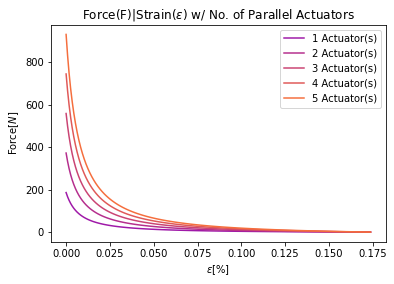

In [8]:
strain = X/h
fig, ax = plt.subplots() 
colour = ["#9F19A8ff","#B52E8Dff","#CA4473ff","#E05958ff" , "#F56E3Dff"]
for it in range(1,6):  
    # # Load of spring
    # P = K[it]*X

    # Force output of actuator
    F = (it+it)*lamb*(np.cos(alp)/(1-np.cos(alp)))
    ax.plot(strain,F,color = colour[it-1], label = str(it) + ' Actuator(s)')
plt.xlabel(r"$\epsilon [\%]$")
plt.ylabel(r"Force"r"$[N]$")
plt.title("Force(F)|Strain($\epsilon$) w/ No. of Parallel Actuators")
leg = plt.legend(loc = 'upper right')


1
2.739121620368832
2
10.113048086325586
3
19.591464212420973
4
26.957178022906497
5
26.306120751733516
6
10.047346842554942
7
-31.096966051277708


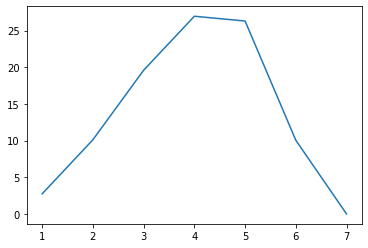

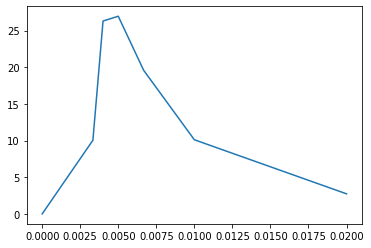

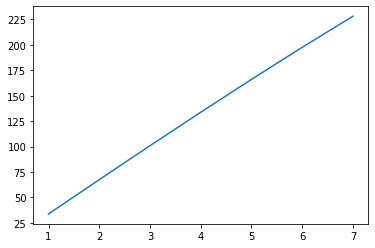

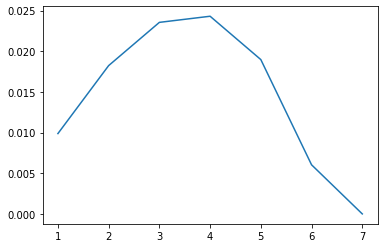

In [4]:

# Specific Energy with scaling behaviour 
xb = np.sqrt(A/np.pi)
yb = w 
zb = h 
Vol = xb*yb*zb
mass = (Lp*t*w*2*rho_f + A*w*rho_o) # film + oil mass
num = 20 #number of series divisions
uact = np.ones(num)
Uact = np.zeros(num)
N = np.zeros(num)
lpp = np.zeros(num) #single pouch length
Fwbblock =np.zeros(num)
Fwb =np.zeros(num)
n=1
while n>0:
   
    print(n)
    N[n-1] = n
    mass_act = mass/n
    mass_sarc = mass/(n*n)
    Lp_sarc = Lp/n 
    
    ## Bending
    # Define new constants
    # https://www.m-petfilm.de/en/service/comparative-data-for-plastic-films/ for youngs mods
    # Electrode length
    Le = Lp_sarc*Eper

    #optimal fill eqn based on electrode coverage ratio
    # !!! MIGHT NOT WORK WITH ARRAY !!!
    alpeqn = ((1-Eper)**2)*(2/np.pi) # Easy to calc constant
    y = 0.01 # intial guess of angle
    it = 0.0001 # iteration
    scale = 1.6/it # how many possible
    end = int(scale) # int for loop
    for i in range(0,end): # over scale
        
        func = (y-sin(y)*cos(y))/(y**2) - alpeqn # Find value of remaining equation with embedded alpha0
        
        if func >= 0: # root is transition from negative to positive in this case
            alp0 = y - it # previous value before sign flip returned       
            break #root found, stop
        else:
            y += it #move to next guess
            continue


    #Height
    h = Lp_sarc*(sin(alp0)/alp0) # Height [m]

    #Area w/ restraints 
    # !!! MIGHT NOT WORK WITH ARRAY !!!
    A = (Lp_sarc - Le)**2 /np.pi # Area [m2]

    #Blocking force
    #Fb = (lamb)*(cos(alp0)/(1-cos(alp0)))

    Lpf = Lp_sarc - Le # Fully Deformed pouch length 

    xmax = h - (Lpf*(sin(alpf)/alpf)) - Le # max displacement

    alp = np.linspace(alp0,alpf,res) #sweep alpha and SET RESOLUTION

    # Blocks of lp(alp) eqn sweep
    lpnum = 2*A*np.square(alp)
    lpdom = (alp - np.sin(alp)*np.cos(alp))
    lp2 = lpnum/lpdom
    lp = lp2**0.5
    lp[0] = Lp_sarc # Removes unphysical discretisation error

    # electrode length sweep
    le = Lp_sarc - lp 

    # displacement sweep
    lpmp = np.sin(alp)/alp # lp multiplier in x
    lplpmp = lp*lpmp
    X = h - lplpmp - le

    Ymt = 4.5e9 # youngs modulus in machined direction N/m
    Ymm = 2.5e9 # yong mod in trans direction N/m 
    nu = 0.33 # Poissons ratio

    D = ((t**3)*w*Ymm)/(12*(1-nu**2)) # Bending stiffness
    k = (2*alp)/lp # Curvature of membrane

    Ub = D*k**2*lp # Bending Energy

    # Force w/ Bending from single sarc
    Fwb = n*(lamb*(np.cos(alp)/(1-np.cos(alp))) + 2*D*((alp-np.sin(alp)*np.cos(alp))/A) * (np.cos(alp)/(1-np.cos(alp))) * (1+(2*alp*np.tan(alp)**2)/(alp-np.tan(alp))))
    #Fwbblock[n-1] = lamb*(np.cos(alp0)/(1-np.cos(alp0))) + 2*D*(alp0-np.sin(alp0)*np.cos(alp0)/A) * (np.cos(alp0)/(1-np.cos(alp0))) * (1+(2*alp0*np.tan(alp0)**2)/(alp0-np.tan(alp0))))
    #F = lamb*(np.cos(alp)/(1-np.cos(alp)))
    Fwbblock[n-1] = Fwb[0]
    # Energy output of actuator
    Uact[n-1] = spy.integrate.trapezoid(Fwb,X*n)
    uact[n-1] = Uact[n-1]/mass_act
    print(uact[n-1])
    if uact[n-1] < 0:
        break
    else:
        lpp[n-1] = Lp_sarc
        #print(np.amax(X)*n)
        n += 1

uact = uact[0:n]
Uact = Uact[0:n]
N = N[0:n]
lpp = lpp[0:n] #single pouch length
Fwbblock = Fwbblock[0:n]
Fwb = Fwb[0:n]
for n in range(len(uact)):
    if uact[n]<0:
        uact[n]=0
        Uact[n] =0
        
        break
    else:
        continue
plt.plot(N,uact)
plt.figure()
plt.plot(lpp,uact)  
plt.figure()
plt.plot(N,Fwbblock)
plt.figure()
plt.plot(N,Uact)


Text(0.5, 1.0, 'Specific Energy (u) w/ Series Actuator Number (n)')

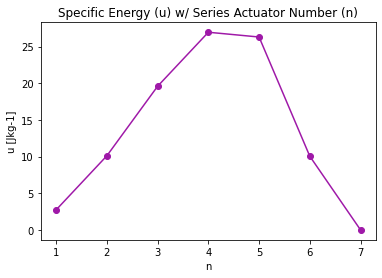

In [5]:
fig, ax =plt.subplots()
ax.plot(N,uact,  color='#9F19A8')
ax.scatter(N,uact,  color='#9F19A8')
plt.xlabel('n')
plt.ylabel('u [Jkg-1]')
plt.title('Specific Energy (u) w/ Series Actuator Number (n)')

26.957178022906497


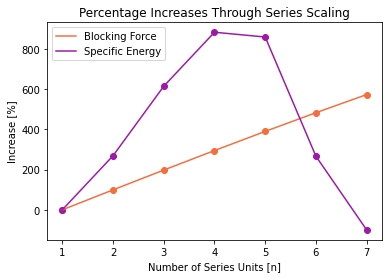

In [6]:
pFb = np.zeros_like(uact)
puact = np.zeros_like(uact)
for i in range(len(uact)):    
    pFb[i] =100*(Fwbblock[i]-Fb)/Fb #percentage gain of original FB
    puact[i] = 100*(uact[i]-uact[0])/uact[0]
print(np.amax(uact))   
pFb[0] = 0 
fig, ax = plt.subplots()
ax.plot(N,pFb,color='#F56E3D', label='Blocking Force')
ax.plot(N,puact,color='#9F19A8', label='Specific Energy')
ax.scatter(N,pFb,color='#F56E3D')
ax.scatter(N,puact,color='#9F19A8')
plt.xlabel("Number of Series Units [n]")
plt.ylabel("Increase [%]")
plt.title(r"Percentage Increases Through Series Scaling")
leg = plt.legend(loc = 'upper left')